### Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

### 1. Считываем файл Data.csv

In [2]:
df = pd.read_csv("main2/Data.csv") 

In [3]:
df.head(5)

,Номер пожара,Дата,X,Y,"Площадь, га","температура, °С","относительная влажность, %","влажность почвы (в слое 0-10см), %","атмосферное давление, мбар",Тип растительности
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес


In [4]:
df.shape

(49, 10)

### 1.1 Переименовываем колонки (на англ яз.)

In [10]:
df.rename(columns={df.columns[0]: "Fire number", df.columns[1]: "Date", 
                   df.columns[4]: "Area", df.columns[5]: "Temp", df.columns[6]: "Rel_hum",
                   df.columns[7]: "Soil_moist", df.columns[8]: "Atm_pres", df.columns[9]: "V_type"}, inplace = True)

In [11]:
df.head()

,Fire number,Date,X,Y,Area,Temp,Rel_hum,Soil_moist,Atm_pres,V_type
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес


### 1.2 Информация о данных

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fire number  49 non-null     int64  
 1   Date         49 non-null     object 
 2   X            49 non-null     float64
 3   Y            49 non-null     float64
 4   Area         49 non-null     int64  
 5   Temp         49 non-null     float64
 6   Rel_hum      49 non-null     float64
 7   Soil_moist   49 non-null     float64
 8   Atm_pres     49 non-null     float64
 9   V_type       49 non-null     object 
dtypes: float64(6), int64(2), object(2)
memory usage: 4.0+ KB


In [13]:
df.describe()

,Fire number,X,Y,Area,Temp,Rel_hum,Soil_moist,Atm_pres
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,139643.653061,47.183271,42.488180,97.836735,16.025878,48.957143,27.438571,887.863265
std,99941.919391,0.574760,0.486414,184.406407,8.884035,16.539549,7.554540,76.999674
min,13167.000000,45.830200,41.595000,3.000000,-2.390000,20.100000,14.080000,752.500000
25%,26566.000000,46.829700,42.163600,12.000000,12.219000,37.100000,21.780000,807.500000
50%,143057.000000,47.456200,42.333100,26.000000,14.382000,48.100000,27.470000,910.300000
75%,204400.000000,47.664300,42.883500,90.000000,19.844000,60.500000,30.730000,953.500000
max,293489.000000,47.834500,43.369900,961.000000,33.758000,90.700000,43.770000,1023.600000


## 2. Визуализация

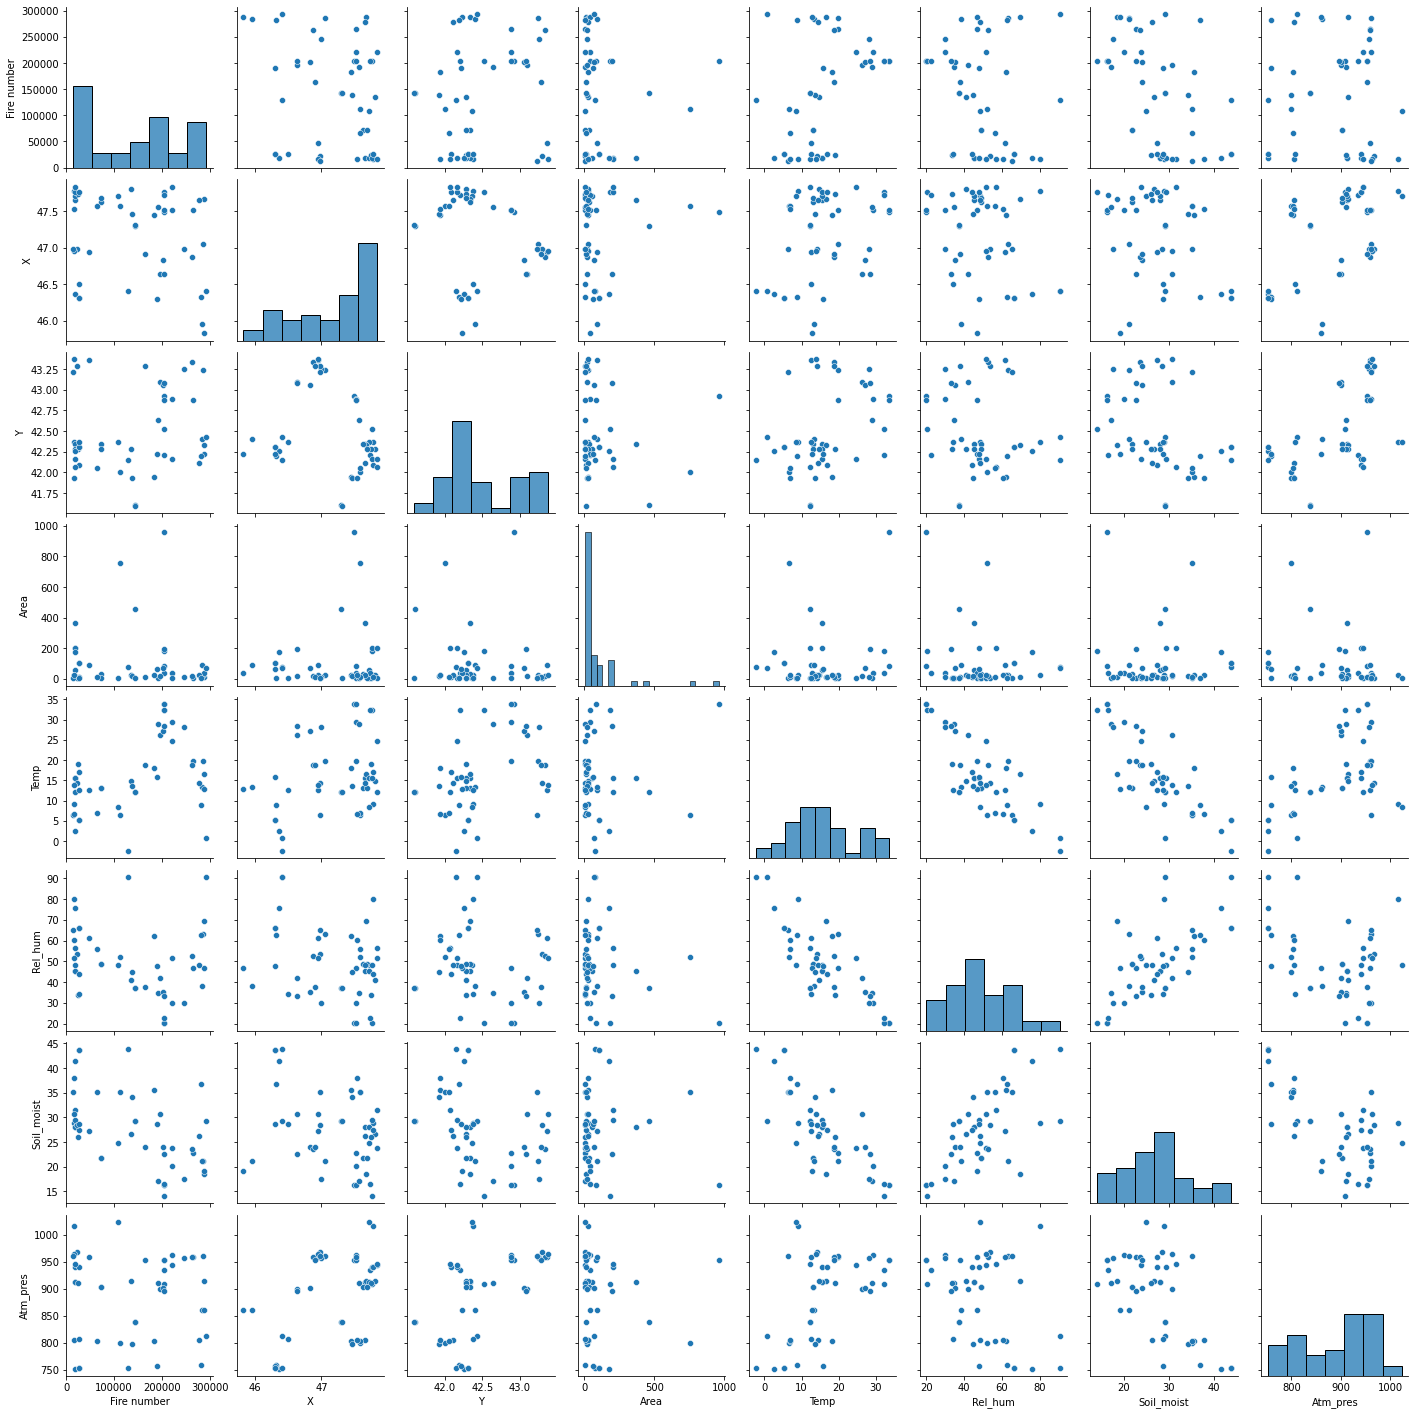

In [14]:
sns.pairplot(df[:]);

### 2.1 Кол-во пожаров по типам растительности (V_type)

#### кол-во уникальных значений (V_type)

In [15]:
df['V_type'].value_counts()

Луг                 26
Лиственный лес      22
Темнохвойный лес     1
Name: V_type, dtype: int64

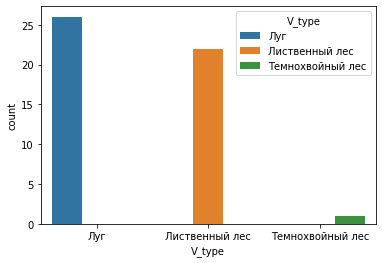

In [16]:
sns.countplot(x=df['V_type'], hue=df['V_type']);

### 2.2 Добавляем новый признак (месяц)

In [17]:
# date.split('/')[0] - номер месяца

df['Num_month'] = df['Date'].apply(lambda date: int(date.split('/')[0]))

In [18]:
df.head()

,Fire number,Date,X,Y,Area,Temp,Rel_hum,Soil_moist,Atm_pres,V_type,Num_month
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг,7
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг,7
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг,7
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг,10
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес,6


In [19]:
### функция для преобразования номера месяца в название месяца
def to_month(num_month):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return months[num_month - 1]

### функция для преобразования даты в день недели
def to_day_week(date):
    month = int(date.split('/')[0])
    day = int(date.split('/')[1])
    year = int(date.split('/')[2])
    today = datetime.datetime(year, month, day)
    num_day_week = today.weekday()
    days_week = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    return days_week[num_day_week]

### 2.3 Кол-во пожаров по месяцам каждой растительности 

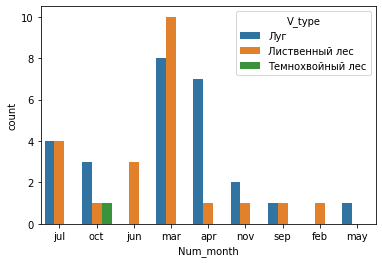

In [20]:
### to_month(num_month) - преобразуем номер в название месяца
sns.countplot(x=df['Num_month'].apply(lambda num_month: to_month(num_month)), hue=df['V_type']);

### 2.4 Кол-во пожаров по дням недели каждой растительности 

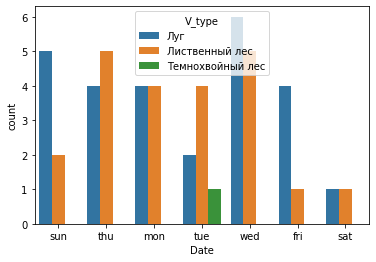

In [21]:
### to_day_week(date) - преобразуем дату в название дня недели
sns.countplot(x=df['Date'].apply(lambda date: to_day_week(date)), hue=df['V_type']);

### 2.5 Распределение Area и Temp для каждого пожара

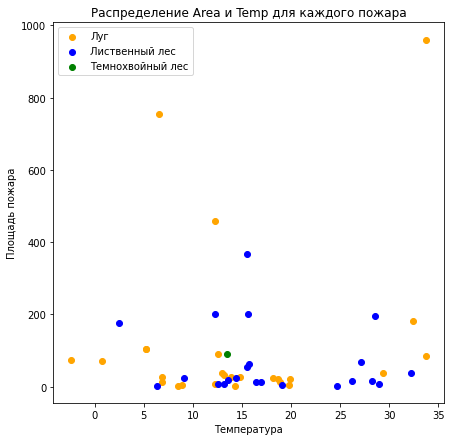

In [22]:
lugs = df[(df['V_type'] == 'Луг')]
listv_forest = df[(df['V_type'] == 'Лиственный лес')]
temn_forest = df[(df['V_type'] == 'Темнохвойный лес')]

plt.figure(figsize=(7, 7))
plt.scatter(lugs['Temp'], lugs['Area'], color='orange', label='Луг');
plt.scatter(listv_forest['Temp'], listv_forest['Area'], color='blue', label='Лиственный лес');
plt.scatter(temn_forest['Temp'], temn_forest['Area'], color='green', label='Темнохвойный лес');

plt.xlabel('Температура');
plt.ylabel('Площадь пожара');
plt.title('Распределение Area и Temp для каждого пожара');
plt.legend();

### 2.6 Распределение Area и Soil_moist для каждого пожара

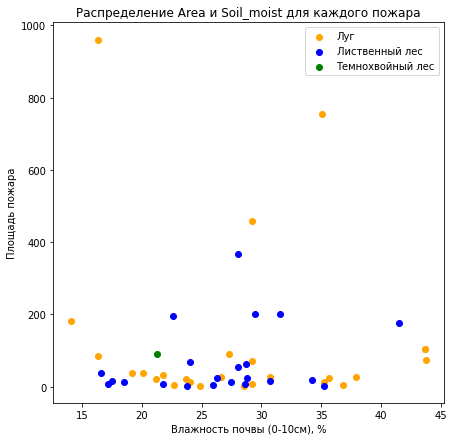

In [23]:
lugs = df[(df['V_type'] == 'Луг')]
listv_forest = df[(df['V_type'] == 'Лиственный лес')]
temn_forest = df[(df['V_type'] == 'Темнохвойный лес')]

plt.figure(figsize=(7, 7))
plt.scatter(lugs['Soil_moist'], lugs['Area'], color='orange', label='Луг');
plt.scatter(listv_forest['Soil_moist'], listv_forest['Area'], color='blue', label='Лиственный лес');
plt.scatter(temn_forest['Soil_moist'], temn_forest['Area'], color='green', label='Темнохвойный лес');

plt.xlabel('Влажность почвы (0-10см), %');
plt.ylabel('Площадь пожара');
plt.title('Распределение Area и Soil_moist для каждого пожара');
plt.legend();

## 3. Строим модель и прогнозируем площадь пожара

### 3.1 Удаляем незначительные признаки и меняем значения признака V_type

In [24]:
df.head()

,Fire number,Date,X,Y,Area,Temp,Rel_hum,Soil_moist,Atm_pres,V_type,Num_month
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг,7
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг,7
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг,7
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг,10
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес,6


In [25]:
df.drop(['Fire number', 'X', 'Y', 'Date', 'Num_month'], axis=1, inplace=True)

In [26]:
df['V_type'] = df['V_type'].map({'Луг': 0, 'Лиственный лес': 1, 'Темнохвойный лес': 2})

In [27]:
df.head()

,Area,Temp,Rel_hum,Soil_moist,Atm_pres,V_type
0,961,33.758,20.1,16.29,953.5,0
1,39,29.325,30.1,20.07,962.1,0
2,85,33.758,20.1,16.29,953.5,0
3,5,19.844,47.0,22.71,959.2,0
4,7,28.925,34.9,17.16,910.3,1


### 3.2 Создание модели "Дерево решений"

In [28]:
df_test = pd.read_csv("main2/Test.csv") 

df_test.rename(columns={df_test.columns[0]: "Fire number", df_test.columns[1]: "Date", 
                   df_test.columns[4]: "Area", df_test.columns[5]: "Temp", df_test.columns[6]: "Rel_hum",
                   df_test.columns[7]: "Soil_moist", df_test.columns[8]: "Atm_pres", df_test.columns[9]: "V_type"}, inplace = True)

In [29]:
df_test.head()

,Fire number,Date,X,Y,Area,Temp,Rel_hum,Soil_moist,Atm_pres,V_type
0,293489,11/17/2020,46.4105,42.422,71,0.712,90.7,29.22,811.9,Лиственный лес


In [30]:
df_test.drop(['Fire number', 'X', 'Y', 'Date'], axis=1, inplace=True)
df_test['V_type'] = df_test['V_type'].map({'Луг': 0, 'Лиственный лес': 1, 'Темнохвойный лес': 2})
y_train = df['Area'].astype('int')
X_train = df.drop('Area', axis=1)
y_valid = df_test['Area'].astype('int')
X_valid = df_test.drop('Area', axis=1)


In [31]:
X_train, X_valid, y_train, y_valid = X_train, X_valid, y_train, y_valid 

In [32]:
X_valid

,Temp,Rel_hum,Soil_moist,Atm_pres,V_type
0,0.712,90.7,29.22,811.9,1


In [33]:
X_train.shape, X_valid.shape

((49, 5), (1, 5))

In [34]:
X_valid.head()

,Temp,Rel_hum,Soil_moist,Atm_pres,V_type
0,0.712,90.7,29.22,811.9,1


In [35]:
from sklearn.neighbors import KNeighborsClassifier
first_knn = KNeighborsClassifier()

In [36]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=4)) 

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


0.04006410256410256

In [37]:
knn_params = {'n_neighbors': range(5, 30, 5)} #+ list(range(50, 100, 10))}

In [38]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(first_knn, knn_params, cv=4)

In [39]:
%%time
knn_grid.fit(X_train, y_train)

Wall time: 112 ms


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 30, 5)})

In [40]:
knn_grid.best_score_, knn_grid.best_params_

(0.10256410256410256, {'n_neighbors': 20})

In [41]:
X_valid

,Temp,Rel_hum,Soil_moist,Atm_pres,V_type
0,0.712,90.7,29.22,811.9,1


In [42]:
tree_valid_pred = knn_grid.predict(X_valid)

In [43]:
tree_valid_pred

array([6])

In [44]:
from sklearn.metrics import accuracy_score


In [45]:
accuracy_score(y_valid, tree_valid_pred)


0.0

In [46]:
1 - np.mean(y)

NameError: name 'y' is not defined